### Intro

This notebook evaluates the base Brownian Motion Win Probability model by using seasons 2011-2016 as the training set and testing using seasons 2017 and 2018. Since the output of the model is a probability, the validation is being done using [reliability diagrams](https://www.jmp.com/support/downloads/JMPC71_documentation/Content/JMPCUserGuide/GR_C_0025.htm#clinical_output_book_1792448248_632092).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from nba_win_probability import dataloader, transformations, plotting, win_probability

In [2]:
training_seasons = ["2011", "2012", "2013", "2014", "2015", "2016"]
training = dataloader.load_multiple_seasons(training_seasons)
training = transformations.transform_data_for_analysis(training)
training = training[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'PCTIMESTRING', 'PERIOD', 'SCORE', 'SCOREMARGIN', 'SEASON', 'QUARTER_TS', 'TIME_ELAPSED', 'MINUTE', 'SCORE_BY_MINUTE']]

testing = dataloader.load_multiple_seasons(["2017", "2018"])
testing = transformations.transform_data_for_analysis(testing)
testing = testing[['GAME_ID', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION', 'PCTIMESTRING', 'PERIOD', 'SCORE', 'SCOREMARGIN', 'SEASON', 'QUARTER_TS', 'TIME_ELAPSED', 'MINUTE', 'SCORE_BY_MINUTE']]



In [3]:
scores_by_minute = training['SCORE_BY_MINUTE']
bwp = win_probability.BrownianWinProbabilitySimulation(scores_by_minute, seed=808)

In [4]:
# Estimate the win probability and add the actual game result for each row of the testing set
testing_set = transformations.add_game_result_column(testing)
testing_set = testing_set[testing_set['RESULT'] != 'undefined']
testing_set = transformations.get_moment_from_each_game(testing_set)
testing_set = transformations.assign_win_probabilities(testing_set, bwp)
testing_set = testing_set.astype({'RESULT': int})

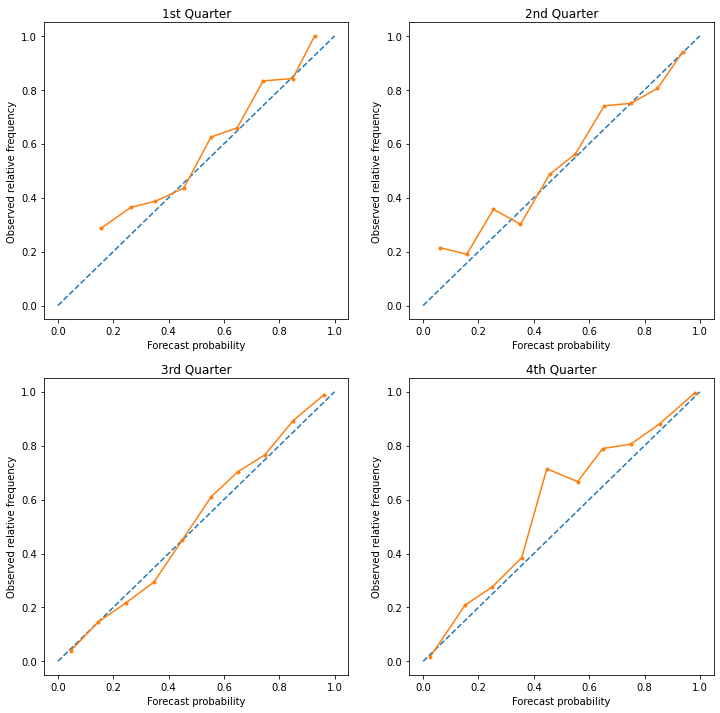

In [5]:
plotting.plot_reliability_diagram_by_quarter(testing_set)

### Conclusion

The reliability diagrams look like they match the observed data very well. The 3rd quarter in particular is spot-on, but I am not quite sure what is happening in the 4th quarter. All-in-all, this brownian simulation approach looks to be fairly effective. 